## Building a Movie Content Based Recommendation System

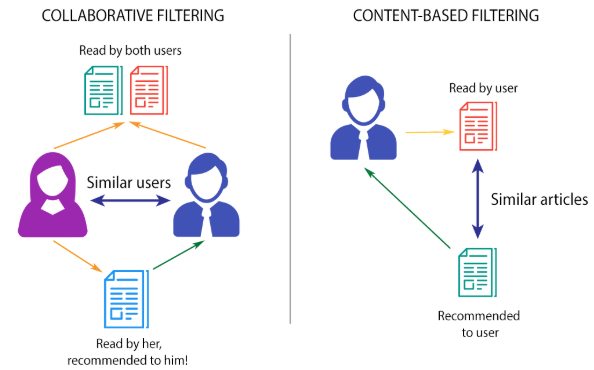

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#https://www.kaggle.com/tmdb/tmdb-movie-metadata
credits = pd.read_csv("tmdb_5000_credits.csv")

In [ ]:
movies_df = pd.read_csv("tmdb_5000_movies.csv")

In [ ]:
credits.head()

In [ ]:
movies_df.head()

In [ ]:
print("Credits:",credits.shape)
print("Movies Dataframe:",movies_df.shape)

In [ ]:
credits_column_renamed = credits.rename(index=str, columns={"movie_id": "id"})
movies_df_merge = movies_df.merge(credits_column_renamed, on='id')
movies_df_merge.head()

In [ ]:
movies_cleaned_df = movies_df_merge.drop(columns=['homepage', 'title_x', 'title_y', 'status','production_countries'])
movies_cleaned_df.head()

In [ ]:
movies_cleaned_df.info()

### Content Based Recommendation System

Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [ ]:
movies_cleaned_df.head(1)['overview']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
movies_cleaned_df['overview'] = movies_cleaned_df['overview'].fillna('')

In [ ]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies_cleaned_df['overview'])

In [ ]:
tfv_matrix

In [ ]:
tfv_matrix.shape

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [ ]:
sig[0]

In [ ]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_cleaned_df.index, index=movies_cleaned_df['original_title']).drop_duplicates()

In [ ]:
indices

In [ ]:
indices['Newlyweds']

In [ ]:
sig[4799]

In [ ]:
list(enumerate(sig[indices['Newlyweds']]))

In [ ]:
sorted(list(enumerate(sig[indices['Newlyweds']])), key=lambda x: x[1], reverse=True)

In [ ]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_cleaned_df['original_title'].iloc[movie_indices]

In [ ]:
# Testing our content-based recommendation system with the seminal film Spy Kids
give_rec('Avatar')